In [374]:
import pandas as pd
import numpy as np

In [375]:
df = pd.read_csv("E1 V2 Final - Full - Language check - FOR PROLIFIC_4 giugno 2024_14.05.csv").drop([0,1])

In [376]:
len(df)

129

In [377]:
attention_questions = [c for c in df.columns if c.startswith("attention")]

In [378]:
df["all_attentions"] = df[attention_questions].count(axis=1)

In [379]:
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,attention_Disagree_50],attention_Agree_51],attention_Agree_52],attention_Strongly disagree_53],attention_Strongly agree_54],attention_Agree_55],attention_Disagree_56],attention_Strongly disagree_57],PROLIFIC_PID,all_attentions
2,30-05-24 22:44,30-05-24 22:46,IP Address,217.201.149.132,100,115,TRUE,30-05-24 22:46,R_2ET5I27aWdfnBRx,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6527d5e2e4a9568285c94649,2
3,30-05-24 22:50,30-05-24 22:55,IP Address,90.247.134.93,100,307,TRUE,30-05-24 22:55,R_27yt3sOOXoeO71n,NaN,...,NaN,Agree,NaN,NaN,NaN,Agree,NaN,NaN,6658b14717b161dc426bd0f0,4
4,30-05-24 22:50,30-05-24 22:56,IP Address,86.15.36.30,100,367,TRUE,30-05-24 22:56,R_8q8p8qFSxcvHNPZ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6658df36550b0dbb233864ea,0
5,03-06-24 19:45,03-06-24 19:45,IP Address,86.10.105.253,100,4,TRUE,03-06-24 19:45,R_8CLZ0ZaVvkH0GTn,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6383b7d918eb0bcaf1047eed,0
6,03-06-24 19:41,03-06-24 19:46,IP Address,172.218.235.230,100,278,TRUE,03-06-24 19:46,R_3bXb6EUkrjpwNAl,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,655e1de592bef9eaafd726db,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,03-06-24 20:47,03-06-24 21:19,IP Address,92.19.154.129,100,1932,TRUE,03-06-24 21:19,R_8Jz2xbr7gMt0wyz,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,663e5dbb5370402d04233f92,1
127,03-06-24 23:21,03-06-24 23:27,IP Address,142.104.36.133,100,329,TRUE,03-06-24 23:27,R_1Xo0uWo7gGZCyxI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6605b8e08b4ba58daf82c7bc,1
128,30-05-24 22:44,30-05-24 22:46,IP Address,217.201.149.132,100,115,TRUE,30-05-24 22:46,R_2ET5I27aWdfnBRx,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6527d5e2e4a9568285c94649,2
129,30-05-24 22:50,30-05-24 22:55,IP Address,90.247.134.93,100,307,TRUE,30-05-24 22:55,R_27yt3sOOXoeO71n,NaN,...,NaN,Agree,NaN,NaN,NaN,Agree,NaN,NaN,6658b14717b161dc426bd0f0,4


In [380]:
def attention_is_correct(question, reply):
    if type(reply)==type("LOL") :
        if "neither" in question.split("_")[1].lower() and "neither" in reply.lower():
            return 1
        if question.split("_")[1].lower()==reply.lower():
            return 1
    return 0

In [381]:
df_1 = df.copy()

In [382]:
for q in attention_questions:
    df_1[q] = df_1[q].apply(lambda x: attention_is_correct(q, x))

In [383]:
df_1

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,attention_Disagree_50],attention_Agree_51],attention_Agree_52],attention_Strongly disagree_53],attention_Strongly agree_54],attention_Agree_55],attention_Disagree_56],attention_Strongly disagree_57],PROLIFIC_PID,all_attentions
2,30-05-24 22:44,30-05-24 22:46,IP Address,217.201.149.132,100,115,TRUE,30-05-24 22:46,R_2ET5I27aWdfnBRx,NaN,...,0,0,0,0,0,0,0,0,6527d5e2e4a9568285c94649,2
3,30-05-24 22:50,30-05-24 22:55,IP Address,90.247.134.93,100,307,TRUE,30-05-24 22:55,R_27yt3sOOXoeO71n,NaN,...,0,1,0,0,0,1,0,0,6658b14717b161dc426bd0f0,4
4,30-05-24 22:50,30-05-24 22:56,IP Address,86.15.36.30,100,367,TRUE,30-05-24 22:56,R_8q8p8qFSxcvHNPZ,NaN,...,0,0,0,0,0,0,0,0,6658df36550b0dbb233864ea,0
5,03-06-24 19:45,03-06-24 19:45,IP Address,86.10.105.253,100,4,TRUE,03-06-24 19:45,R_8CLZ0ZaVvkH0GTn,NaN,...,0,0,0,0,0,0,0,0,6383b7d918eb0bcaf1047eed,0
6,03-06-24 19:41,03-06-24 19:46,IP Address,172.218.235.230,100,278,TRUE,03-06-24 19:46,R_3bXb6EUkrjpwNAl,NaN,...,0,0,0,0,0,0,0,0,655e1de592bef9eaafd726db,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,03-06-24 20:47,03-06-24 21:19,IP Address,92.19.154.129,100,1932,TRUE,03-06-24 21:19,R_8Jz2xbr7gMt0wyz,NaN,...,0,0,0,0,0,0,0,0,663e5dbb5370402d04233f92,1
127,03-06-24 23:21,03-06-24 23:27,IP Address,142.104.36.133,100,329,TRUE,03-06-24 23:27,R_1Xo0uWo7gGZCyxI,NaN,...,0,0,0,0,0,0,0,0,6605b8e08b4ba58daf82c7bc,1
128,30-05-24 22:44,30-05-24 22:46,IP Address,217.201.149.132,100,115,TRUE,30-05-24 22:46,R_2ET5I27aWdfnBRx,NaN,...,0,0,0,0,0,0,0,0,6527d5e2e4a9568285c94649,2
129,30-05-24 22:50,30-05-24 22:55,IP Address,90.247.134.93,100,307,TRUE,30-05-24 22:55,R_27yt3sOOXoeO71n,NaN,...,0,1,0,0,0,1,0,0,6658b14717b161dc426bd0f0,4


In [384]:
df_1["attention_correct"] = df_1[attention_questions].sum(axis=1)

In [385]:
df_1["percentage_correct"] = df_1["attention_correct"]/df["all_attentions"]

In [386]:
df_1["percentage_correct"].value_counts()

percentage_correct
1.0    93
0.0     1
Name: count, dtype: int64

In [387]:
id_excluded = df[df_1["percentage_correct"]<1]["PROLIFIC_PID"]

In [388]:
df_correct = df[~df["PROLIFIC_PID"].isin(id_excluded)]

In [352]:
col_iro = [c for c in df_correct if c.startswith("ironic")]

In [353]:
col_notiro = [c for c in df_correct if c.startswith("notironic")]

In [354]:
np.mean(df_correct[col_iro].count())

3.1551724137931036

In [355]:
df_correct = df_correct.replace({"Strongly Agree":2, "Agree":1, "Neither Agree nor Disagree":0, "Disagree":-1, "Strongly Disagree":-2})

C:\Users\silvi\AppData\Local\Temp\ipykernel_14572\1959086369.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_correct = df_correct.replace({"Strongly Agree":2, "Agree":1, "Neither Agree nor Disagree":0, "Disagree":-1, "Strongly Disagree":-2})


In [356]:
df_correct["ironic_1578449215663280128]"].value_counts()

ironic_1578449215663280128]
1.0    1
2.0    1
0.0    1
Name: count, dtype: int64

In [357]:
iro_counts = np.unique(df_correct[col_iro].values, return_counts=True)[1][:-1]

In [368]:
sum(iro_counts[2:])/sum(iro_counts)

0.5707346690953249

In [358]:
not_iro_count = np.unique(df_correct[col_notiro].values, return_counts=True)[1][:-1]

In [359]:
not_iro_count

array([452, 591, 227, 297,  80], dtype=int64)

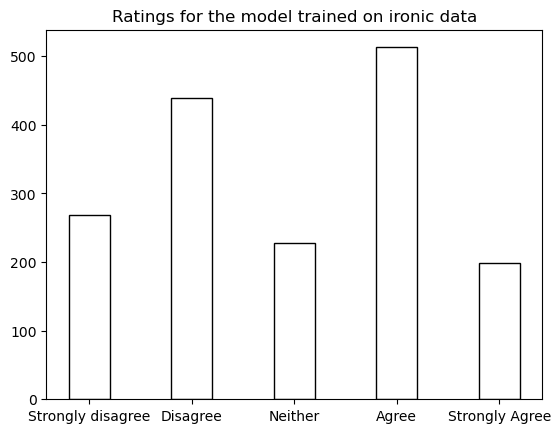

In [335]:
import matplotlib.pyplot as plt 
plt.bar(["Strongly disagree", "Disagree", "Neither", "Agree", "Strongly Agree"], iro_counts, color ='white', edgecolor ="black", 
        width = 0.4)
plt.title("Ratings for the model trained on ironic data")
#plt.bar(["Strongly disagree", "Disagree", "Neither", "Agree", "Strongly Agree"], not_iro_count, color ='blue', 
        #width = 0.4, alpha=0.3)
plt.savefig("ironic.png")


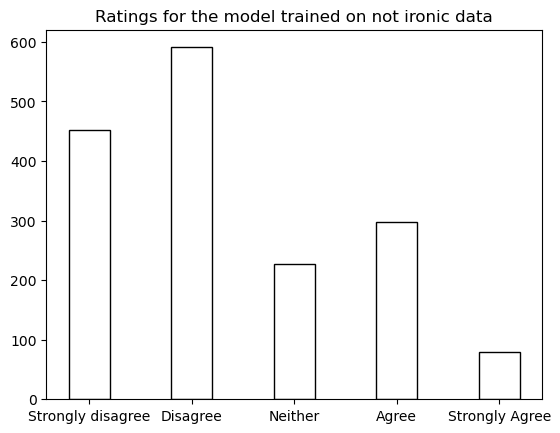

In [336]:
plt.bar(["Strongly disagree", "Disagree", "Neither", "Agree", "Strongly Agree"], not_iro_count, color ='white', edgecolor ="black", 
        width = 0.4)
plt.title("Ratings for the model trained on not ironic data")
plt.savefig("not_ironic.png")


In [294]:
acc_ironic = df_correct[col_iro].sum()

In [295]:
acc_not_ironic = df_correct[col_notiro].sum()

In [296]:
def who_wins(iro, not_iro):
    if iro>not_iro: 
        return 1
    elif iro==not_iro: 
        return 0
    else: return -1

In [297]:
pd.Series([who_wins(i, n) for i, n in zip(acc_ironic, acc_not_ironic)]).value_counts()

 1    325
-1    130
 0     67
Name: count, dtype: int64

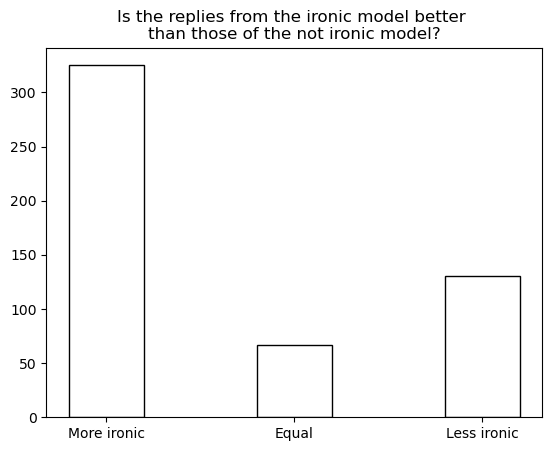

In [373]:
plt.bar(["More ironic", "Equal", "Less ironic"], [325, 67, 130], color ='white', edgecolor ="black", 
        width = 0.4)
plt.title("Is the replies from the ironic model better \nthan those of the not ironic model?")
plt.savefig("comparison.png")


In [268]:
id_excluded = df[df_1["percentage_correct"]==0]["PROLIFIC_PID"]
for c in attention_questions:
    if type(df[df["PROLIFIC_PID"]==id_excluded.iloc[0]][attention_questions][c].values[0])==type("LOL"):
        print(c, df[df["PROLIFIC_PID"]==id_excluded.iloc[0]][attention_questions][c].values[0])

attention_Neither agree not disagree_27] Neither Agree nor Disagree


In [247]:
df[df["PROLIFIC_PID"]==id_excluded.iloc[0]][attention_questions].values[0]=="Agree"

TypeError: only integer scalar arrays can be converted to a scalar index

In [397]:
df_correct.drop(attention_questions, axis=1).to_csv("E1_annotations_clean.csv", index=False)

In [391]:
attention_questions

['attention_Strongly agree_0]',
 'attention_Neither agree not disagree_1]',
 'attention_Disagree_2]',
 'attention_Neither agree not disagree_3]',
 'attention_Strongly disagree_4]',
 'attention_Strongly agree_5]',
 'attention_Strongly agree_6]',
 'attention_Strongly agree_7]',
 'attention_Agree_8]',
 'attention_Agree_9]',
 'attention_Strongly agree_10]',
 'attention_Disagree_11]',
 'attention_Disagree_12]',
 'attention_Disagree_13]',
 'attention_Strongly disagree_14]',
 'attention_Strongly agree_15]',
 'attention_Strongly agree_16]',
 'attention_Agree_17]',
 'attention_Disagree_18]',
 'attention_Agree_19]',
 'attention_Agree_20]',
 'attention_Strongly agree_21]',
 'attention_Disagree_22]',
 'attention_Disagree_23]',
 'attention_Strongly agree_24]',
 'attention_Agree_25]',
 'attention_Strongly agree_26]',
 'attention_Neither agree not disagree_27]',
 'attention_Agree_28]',
 'attention_Neither agree not disagree_29]',
 'attention_Agree_30]',
 'attention_Neither agree not disagree_31]',
 '